In [1]:
import torch
import torch.nn as nn

In [2]:
class DNN(nn.Module):
    def __init__(self, layer_sizes, use_shortcut=False):
        super().__init__()
        
        self.use_shortcut = use_shortcut
        self.layers = torch.nn.ModuleList([
            nn.Sequential(nn.Linear(layer_sizes[i], layer_sizes[i+1]), GELU())
            for i in range(len(layer_sizes) - 1)
        ])

        
    def forward(self, x):
        for layer in self.layers:
            layer_output = layer(x) # compute the output of the current layer
            if self.use_shortcut and x.shape == layer_output.shape: # check if shortcut can be applied
                x = x + layer_output
            else:
                x = layer_output
        return x

<div align="center">
  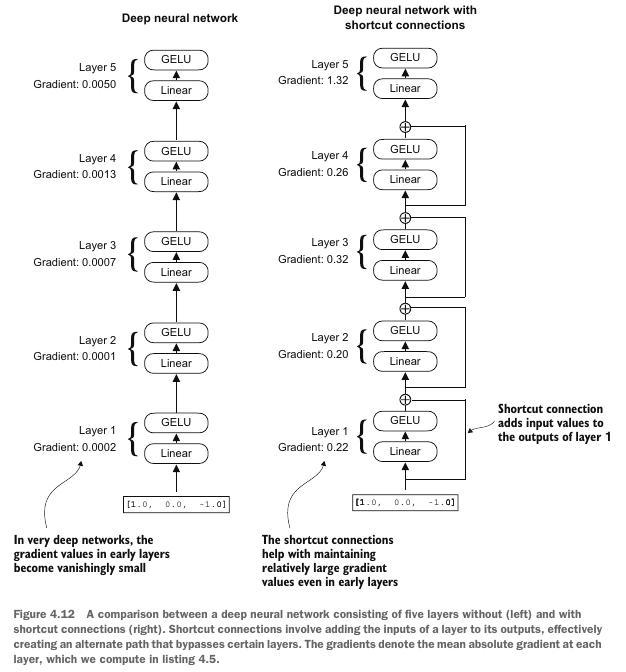
</div>

In [3]:
%%capture
%run 03_FFN_With_GeLU.ipynb

In [4]:
layer_sizes = [3, 3, 3, 3, 3, 1]
sample_input = torch.tensor([[1., 0., -1.]])

In [5]:
def print_gradients(model, x):
    output = model(x) # Forward Pass
    target = torch.tensor([[0.]])

    loss = nn.MSELoss() # Calculate Loss based on how close the Target and Output are
    loss = loss(output, target)
    loss.backward() # backward pass to calculate gradients

    for name, param in model.named_parameters():
        if "weight" in name:
            print(f"{name} has gradient mean of {param.grad.abs().mean().item()}")

In [10]:
torch.manual_seed(123)

dnn_without_shortcut = DNN(layer_sizes, use_shortcut=False)

In [11]:
print("Gradient of DNN Without Shortcut Connections:", end="\n\n")
print_gradients(dnn_without_shortcut, sample_input)

Gradient of DNN Without Shortcut Connections:

layers.0.0.weight has gradient mean of 0.00020173584925942123
layers.1.0.weight has gradient mean of 0.00012011159560643137
layers.2.0.weight has gradient mean of 0.0007152040489017963
layers.3.0.weight has gradient mean of 0.0013988736318424344
layers.4.0.weight has gradient mean of 0.005049645435065031


In [12]:
torch.manual_seed(123)

dnn_with_shortcut = DNN(layer_sizes, use_shortcut=True)

In [13]:
print("Gradient of DNN With Shortcut Connections:", end="\n\n")
print_gradients(dnn_with_shortcut, sample_input)

Gradient of DNN With Shortcut Connections:

layers.0.0.weight has gradient mean of 0.22169791162014008
layers.1.0.weight has gradient mean of 0.20694105327129364
layers.2.0.weight has gradient mean of 0.32896995544433594
layers.3.0.weight has gradient mean of 0.2665732204914093
layers.4.0.weight has gradient mean of 1.3258540630340576
